In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Setup agar hasil acak kita sama
np.random.seed(42)
n_siswa = 1000

# Generate Data
data = {
    'Jam_Belajar': np.random.randint(10, 200, n_siswa), # 10 s/d 200 jam
    'Skor_Latihan': np.random.randint(40, 100, n_siswa),
    'Tingkat_Pendidikan': np.random.choice(['SMA', 'S1', 'S2'], n_siswa, p=[0.3, 0.6, 0.1]),
    'Metode_Belajar': np.random.choice(['Bootcamp', 'Online Course', 'Buku'], n_siswa),
    'Hasil': np.random.choice(['Lulus', 'Gagal'], n_siswa) # Ini target dummy awal
}

df = pd.DataFrame(data)

# BIKIN POLA (Biar AI bisa belajar, kalau murni random AI bakal bingung)
# Aturan: Kalau belajar lama & skor tinggi & pendidikan tinggi -> Kemungkinan Lulus Besar
score = (df['Jam_Belajar'] * 0.5) + (df['Skor_Latihan'] * 0.8)
score += np.where(df['Tingkat_Pendidikan'] == 'S2', 20, 0)
score += np.where(df['Metode_Belajar'] == 'Bootcamp', 15, 0)

# Tentukan Lulus/Gagal berdasarkan score buatan tadi
threshold = score.median()
df['Hasil'] = np.where(score > threshold, 'Lulus', 'Gagal')

print("Data Siap! (5 Baris Teratas):")
print(df.head())

Data Siap! (5 Baris Teratas):
   Jam_Belajar  Skor_Latihan Tingkat_Pendidikan Metode_Belajar  Hasil
0          112            96                 S1       Bootcamp  Lulus
1          189            41                 S1           Buku  Lulus
2          102            54                SMA  Online Course  Gagal
3           24            50                 S1           Buku  Gagal
4          116            47                 S1       Bootcamp  Gagal


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Jam_Belajar         1000 non-null   int64 
 1   Skor_Latihan        1000 non-null   int64 
 2   Tingkat_Pendidikan  1000 non-null   object
 3   Metode_Belajar      1000 non-null   object
 4   Hasil               1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [14]:
numeric = df.select_dtypes('number').columns
numeric

Index(['Jam_Belajar', 'Skor_Latihan'], dtype='object')

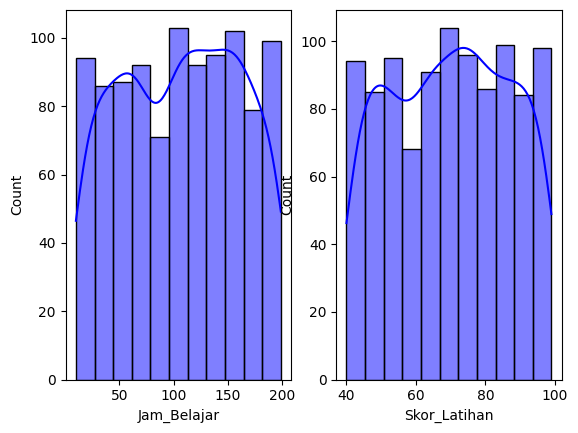

In [17]:
for i, col in enumerate(numeric):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde = True, color = 'blue')

In [20]:
categorical = df.select_dtypes('object').columns
categorical


Index(['Tingkat_Pendidikan', 'Metode_Belajar', 'Hasil'], dtype='object')

/tmp/ipykernel_28756/796336452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col], palette = 'viridis')
/tmp/ipykernel_28756/796336452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col], palette = 'viridis')
/tmp/ipykernel_28756/796336452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col], palette = 'viridis')


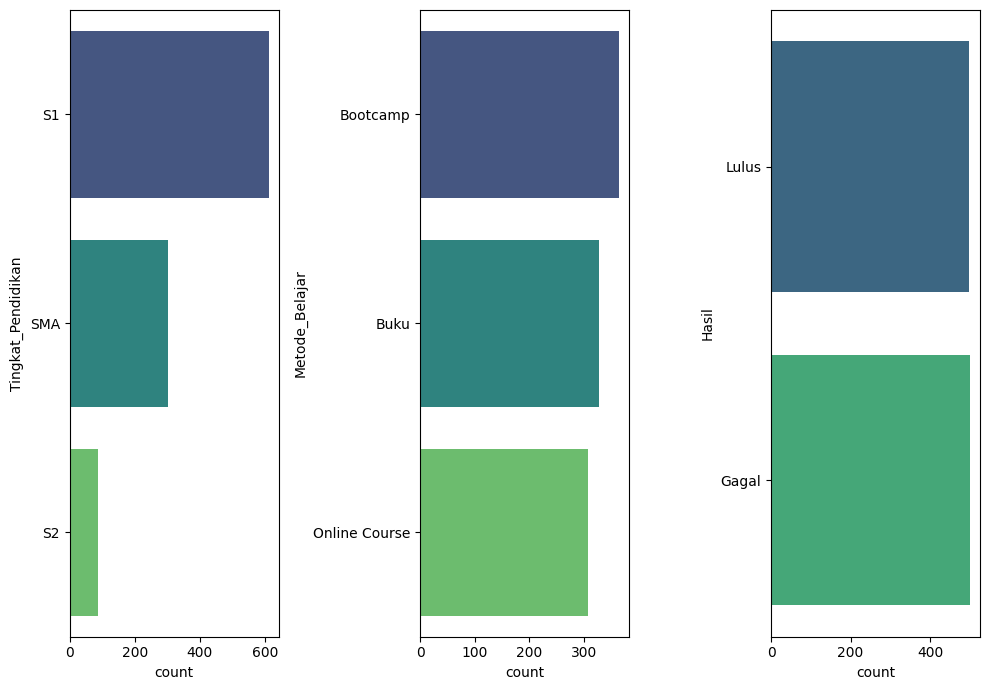

In [25]:
plt.figure(figsize=(10, 7))
for i, col in enumerate(categorical):
    plt.subplot(1, 3, i + 1)
    sns.countplot(df[col], palette = 'viridis')
plt.tight_layout()
plt.show()

# **LABEL ENCODING**

In [27]:
df

,Jam_Belajar,Skor_Latihan,Tingkat_Pendidikan,Metode_Belajar,Hasil
0,112,96,S1,Bootcamp,Lulus
1,189,41,S1,Buku,Lulus
2,102,54,SMA,Online Course,Gagal
3,24,50,S1,Buku,Gagal
4,116,47,S1,Bootcamp,Gagal
...,...,...,...,...,...
995,127,56,S1,Online Course,Gagal
996,122,74,S2,Bootcamp,Lulus
997,103,52,S1,Bootcamp,Gagal
998,188,80,S1,Bootcamp,Lulus


In [73]:
urutan_pendidikan = ({
    'SMA' : 1, 
    'S1' : 2,
    'S2' : 3,
})
label_target = ({
    'Gagal' : 0,
    'Lulus' : 1
})
df['Hasil_Encode'] = df['Hasil'].map(label_target)
df = df.drop(columns='Hasil')

KeyError: 'Hasil'

In [63]:
df

,Jam_Belajar,Skor_Latihan,Metode_Belajar,Tingkat_Pendidikan_Encode,Hasil_encode
0,112,96,Bootcamp,2,1
1,189,41,Buku,2,1
2,102,54,Online Course,1,0
3,24,50,Buku,2,0
4,116,47,Bootcamp,2,0
...,...,...,...,...,...
995,127,56,Online Course,2,0
996,122,74,Bootcamp,3,1
997,103,52,Bootcamp,2,0
998,188,80,Bootcamp,2,1


In [81]:
one_hot = pd.get_dummies(df, columns=['Metode_Belajar'])
one_hot['Hasil_Encode'] = one_hot['Hasil_encode'].copy()
df = one_hot.drop(columns='Hasil_encode')

In [82]:
df

,Jam_Belajar,Skor_Latihan,Tingkat_Pendidikan_Encode,Metode_Belajar_Bootcamp,Metode_Belajar_Buku,Metode_Belajar_Online Course,Hasil_Encode
0,112,96,2,True,False,False,1
1,189,41,2,False,True,False,1
2,102,54,1,False,False,True,0
3,24,50,2,False,True,False,0
4,116,47,2,True,False,False,0
...,...,...,...,...,...,...,...
995,127,56,2,False,False,True,0
996,122,74,3,True,False,False,1
997,103,52,2,True,False,False,0
998,188,80,2,True,False,False,1


# **DATA SPLIT DAN TRAINING MODEL**

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [107]:
x = df.drop(columns='Hasil_Encode')
y = df['Hasil_Encode']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)



In [111]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC(random_state=42)
nb = GaussianNB()

knn.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)
nb.fit(x_train, y_train)
print("Model Telah Belajar")

Model Telah Belajar


In [131]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    #bandingkan prediksi jawaban dengan kunci jawaban 
    result = {
        'Accuracy' : accuracy_score(y_test, y_pred),
        'Precision' : precision_score(y_test, y_pred),
        'Recall' : recall_score(y_test, y_pred),
        'F1-Score' : f1_score(y_test, y_pred)
    }
    return result
result = {
    'KNN' : evaluate_model(knn, x_test, y_test),
    'Decision Tree' : evaluate_model(dt, x_test, y_test),
    'Random Forest' : evaluate_model(rf, x_test, y_test),
    'SVM' : evaluate_model(svm, x_test, y_test),
    'Naive Bayes' : evaluate_model(nb, x_test, y_test)
}

summary_df = pd.DataFrame(result).T
summary_df


,Accuracy,Precision,Recall,F1-Score
KNN,0.915,0.938144,0.892157,0.914573
Decision Tree,0.940,0.932692,0.950980,0.941748
Random Forest,0.970,0.970588,0.970588,0.970588
SVM,0.935,0.940594,0.931373,0.935961
Naive Bayes,0.950,0.933962,0.970588,0.951923
